# CMIP6 Historical model runs
This script opens up all the CMIP6 historical model run files with data on precipitation pr and surface temperature tas and loops over the files.


In [1]:
import xarray as xr, matplotlib.pyplot as plt
#import sys 
#sys.path.append('') # use this if the function file is in a different directory to the notebook
from importlib import reload # need to use this if I edit a function file
import anomaly_function as func # imports the function
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????

In [2]:
# use this to reload the function file if I make any edits to it
func = reload(func) 

In [3]:
!ls /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/pr/gr1.5

v20200302


In [4]:
# store each section of the directory as a string
institution_dir = '/g/data/lp01/CMIP6/CMIP/'
tas_dir = '/historical/r1i1p1f1/Amon/tas/gr1.5/'
pr_dir = '/historical/r1i1p1f1/Amon/pr/gr1.5/'
print(institution_dir, tas_dir, pr_dir)

/g/data/lp01/CMIP6/CMIP/ /historical/r1i1p1f1/Amon/tas/gr1.5/ /historical/r1i1p1f1/Amon/pr/gr1.5/


In [5]:
models_tas = func.read_models(institution_dir, tas_dir, '1850-01','2015-01')

45 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/tas/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tas/gr1.5/v20190919/*.nc
Model MPI-ESM1-2-HR has different time so is now removed
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/tas/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/tas/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190818/*.nc
BCC-ESM1 

In [6]:
models_pr = func.read_models(institution_dir, pr_dir, '1850-01','2015-01')

45 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/pr/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/pr/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/pr/gr1.5/v20190919/*.nc
MPI-ESM1-2-HR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/pr/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/pr/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p

In [7]:
# make sure the models are the same for both vairables
# delete the height from the models_tas array (if it hasn't been deleted already)
if 'height' in models_tas:
    del models_tas['height']
# delete models that aren't common between variables
models_tas = models_tas.where(models_tas.model.isin(models_pr.model), drop = True)
models_pr = models_pr.where(models_pr.model.isin(models_tas.model), drop = True)
#chekc that the models are the same for both variables and if so print True
models_tas.model.equals(models_pr.model)

True

In [8]:
# print final model list
print(models_tas.model.data)

['MPI-ESM-1-2-HAM' 'NESM3' 'ACCESS-CM2' 'MPI-ESM1-2-LR' 'IPSL-CM6A-LR'
 'CAS-ESM2-0' 'FGOALS-f3-L' 'FGOALS-g3' 'BCC-ESM1' 'BCC-CSM2-MR' 'CIESM'
 'TaiESM1' 'KACE-1-0-G' 'CMCC-CM2-SR5' 'GISS-E2-1-G-CC' 'GISS-E2-1-H'
 'GISS-E2-1-G' 'AWI-CM-1-1-MR' 'AWI-ESM-1-1-LR' 'MIROC6' 'MRI-ESM2-0'
 'FIO-ESM-2-0' 'CanESM5' 'ACCESS-ESM1-5' 'GFDL-CM4' 'GFDL-ESM4' 'E3SM-1-1'
 'E3SM-1-1-ECA' 'INM-CM4-8' 'INM-CM5-0' 'EC-Earth3-Veg-LR' 'EC-Earth3'
 'NorCPM1' 'NorESM2-MM' 'CAMS-CSM1-0' 'CESM2' 'CESM2-WACCM' 'CESM2-FV2'
 'CESM2-WACCM-FV2' 'SAM0-UNICON']


In [9]:
# combine precipitation and temperature into one dataset
models = xr.Dataset({'tas': models_tas.tas, 'pr': models_pr.pr})
# change the pr units
models['pr'] = models.pr*86400
models

,Array,Chunk
Bytes,9.12 GB,228.10 MB
Shape,"(40, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,325 Tasks,40 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,18.25 GB,456.19 MB
Shape,"(40, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,365 Tasks,40 Chunks
Type,float64,numpy.ndarray


Right now I have all the models stored in one array so from hereafter I can calculate anomalies etc.  

In [10]:
# area weighting 
models_w = models*np.cos(models_tas.lat*(np.pi/180))

In [11]:
# select out the northern and sourhern hemisphere regions
models_SH = models_w.sel(lat=slice(-90,0))
models_NH = models_w.sel(lat=slice(0,90))


In [12]:
# import land fraction data
landfrac_ds = xr.open_dataset('/home/563/kb6999/Models/landfraction_file_grid1.5.nc')
landmask = landfrac_ds.mean(dim='time')

In [13]:
# this is where I use the land mask and select out the continents
models_w_land = models_w.where(landmask.data==1, drop=True)

In [14]:
# here I select the Australia region with a lon,lat box and the Eastern Australia region
models_aus = models_w_land.sel(lat=slice(-50,-10), lon=slice(110,160)) 
models_EAus = models_w_land.sel(lat=slice(-50,-10), lon=slice(140,155))

In [15]:
# use this to reload the function file if I make any edits to it
func = reload(func) 

In [16]:
# use functions to calculate the monthly and seasonal anomalies for the globe
# global
# monthly
monthly_anom_glob = func.monthly_anomaly(models_w, '1850-01', '1901-01')
# seasonal
seasonal_anom_glob = func.seasonal_anomaly(models_w, '1850-01', '1901-01')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]


In [17]:
# use functions to calculate the monthly and seasonal anomalies for hemispheres
# NH
monthly_anom_NH = func.monthly_anomaly(models_NH, '1850-01', '1901-01')
seasonal_anom_NH = func.seasonal_anomaly(models_NH, '1850-01', '1901-01')
# SH
monthly_anom_SH = func.monthly_anomaly(models_SH, '1850-01', '1901-01')
seasonal_anom_SH = func.seasonal_anomaly(models_SH, '1850-01', '1901-01')


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]


In [18]:
# use functions to calculate the monthly and seasonal anomalies for aus and E aus
# Australia 
monthly_anom_Aus = func.monthly_anomaly(models_aus, '1850-01', '1901-01')
seasonal_anom_Aus = func.seasonal_anomaly(models_aus, '1850-01', '1901-01')

# East Australia
monthly_anom_EA = func.monthly_anomaly(models_EAus, '1850-01', '1901-01')
seasonal_anom_EA = func.seasonal_anomaly(models_EAus, '1850-01', '1901-01')


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]


In [19]:
# take the mean in longitude and latitude for each model
# monthly
mean_mon_Glob = monthly_anom_glob.mean(dim=('lat','lon'))
mean_mon_NH = monthly_anom_NH.mean(dim=('lat','lon'))
mean_mon_SH = monthly_anom_SH.mean(dim=('lat','lon'))
mean_mon_Aus = monthly_anom_Aus.mean(dim=('lat','lon'))
mean_mon_EA = monthly_anom_EA.mean(dim=('lat','lon'))

# Seasonal
mean_seasonal_Glob = seasonal_anom_glob.mean(dim=('lat','lon'))
mean_seasonal_NH = seasonal_anom_NH.mean(dim=('lat','lon'))
mean_seasonal_SH = seasonal_anom_SH.mean(dim=('lat','lon'))
mean_seasonal_Aus = seasonal_anom_Aus.mean(dim=('lat','lon'))
mean_seasonal_EA = seasonal_anom_EA.mean(dim=('lat','lon'))

In [20]:
# calculate the percentiles and then take the mean along the model dimension for monthly anomalies
# 10th percentile
p10_mon_Glob = mean_mon_Glob.chunk({'model': -1}).quantile(0.1, dim=['model']) # this one is right
p10_mon_NH = mean_mon_NH.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_mon_SH = mean_mon_SH.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_mon_Aus = mean_mon_Aus.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_mon_EA = mean_mon_EA.chunk({'model': -1}).quantile(0.1, dim=['model'])

# 90th percentile
p90_mon_Glob = mean_mon_Glob.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_NH = mean_mon_NH.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_SH = mean_mon_SH.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_Aus = mean_mon_Aus.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_EA = mean_mon_EA.chunk({'model': -1}).quantile(0.9, dim=['model'])


In [21]:
# calculate the percentiles and then take the mean along the model dimension for seasonal anomalies
# 10th percentile
p10_seasonal_Glob = mean_seasonal_Glob.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_seasonal_SH = mean_seasonal_SH.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_seasonal_Aus = mean_seasonal_Aus.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_seasonal_EA = mean_seasonal_EA.chunk({'model': -1}).quantile(0.1, dim=['model'])

# 90th percentile
p90_seasonal_Glob = mean_seasonal_Glob.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_seasonal_NH = mean_seasonal_NH.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_seasonal_SH = mean_seasonal_SH.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_seasonal_Aus = mean_seasonal_Aus.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_seasonal_EA = mean_seasonal_EA.chunk({'model': -1}).quantile(0.9, dim=['model'])


In [22]:
# calculate the multi model mean and take the mean in lat and lon
# global
# monthly
mmm_mon_Glob = mean_mon_Glob.mean(dim='model')
mmm_mon_NH = mean_mon_NH.mean(dim='model')
mmm_mon_SH = mean_mon_SH.mean(dim='model')
mmm_mon_Aus = mean_mon_Aus.mean(dim='model')
mmm_mon_EA = mean_mon_EA.mean(dim='model')

# seasonal
mmm_seasonal_Glob = mean_seasonal_Glob.mean(dim='model')
mmm_seasonal_NH = mean_seasonal_NH.mean(dim='model')
mmm_seasonal_SH = mean_seasonal_SH.mean(dim='model')
mmm_seasonal_Aus = mean_seasonal_Aus.mean(dim='model')
mmm_seasonal_EA = mean_seasonal_EA.mean(dim='model')

In [23]:
# calculate the mmm plus/minus std for monthly anom
std_mon_Glob = func.std_bounds(mean_mon_Glob, mmm_mon_Glob)
std_mon_NH = func.std_bounds(mean_mon_NH, mmm_mon_NH)
std_mon_SH = func.std_bounds(mean_mon_SH, mmm_mon_SH)
std_mon_Aus = func.std_bounds(mean_mon_Aus, mmm_mon_Aus)
std_mon_EA = func.std_bounds(mean_mon_EA, mmm_mon_EA)


## Figures

In [36]:
import model_figures as func2 # imports the function


In [45]:
func2 = reload(func2)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

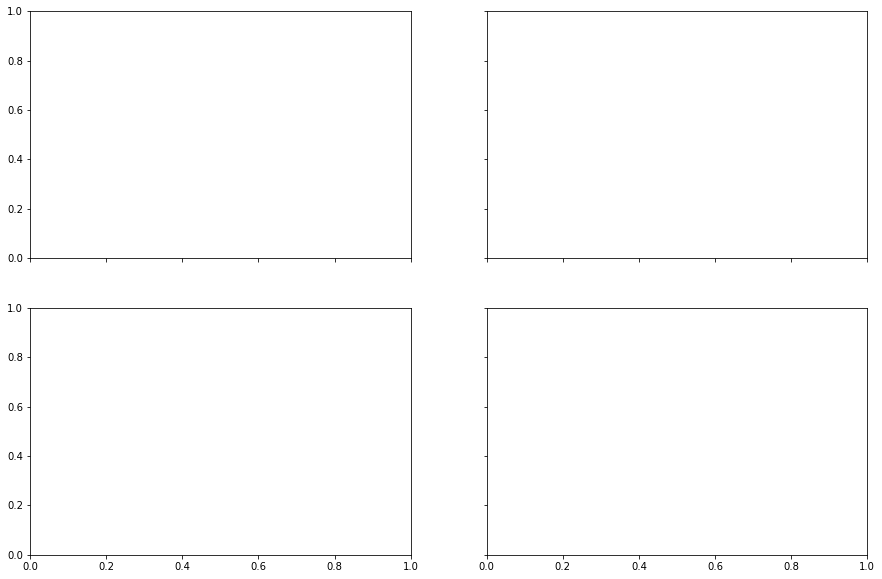

In [47]:
# Monthly temperature anomalies
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,10)) # make a figure

func2.model_subplots(ax, '0,0', mmm_mon_Glob, p10_mon_Glob, p90_mon_Glob, 'tas', 'Monthly temperature anomalies for the Globe', 'Temperature anomaly [C]')
func2.model_subplots(ax, '0,1', mmm_mon_SH, p10_mon_SH, p90_mon_SH, 'tas', 'Monthly temperature anomalies for the SH', 'Temperature anomaly [C]')
func2.model_subplots(ax, '0,1', mmm_mon_Aus, p10_mon_Aus, p90_mon_Aus, 'tas', 'Monthly temperature anomalies for Australia', 'Temperature anomaly [C]')
#func2.model_subplots(ax, '0,1', mmm_mon_EA, p10_mon_EA, p90_mon_EA, 'tas', 'Monthly temperature anomalies for Eastern Australia', 'Temperature anomaly [C]')

In [ ]:
# Monthly temperature anomalies
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,10)) # make a figure

func2.model_suplots('0,0', mmm_mon_Glob, p10_mon_Glob, p90_mon_Glob, tas, 'Monthly temperature anomalies for the Globe', 'Temperature anomaly [C]')
func2.model_suplots('0,1', mmm_mon_SH, p10_mon_SH, p90_mon_SH, tas, 'Monthly temperature anomalies for the SH', 'Temperature anomaly [C]')
func2.model_suplots('0,1', mmm_mon_Aus, p10_mon_Aus, p90_mon_Aus, tas, 'Monthly temperature anomalies for Australia', 'Temperature anomaly [C]')
func2.model_suplots('0,1', mmm_mon_EA, p10_mon_EA, p90_mon_EA, tas, 'Monthly temperature anomalies for Eastern Australia', 'Temperature anomaly [C]')

In [ ]:
# Monthly precipitation anomalies
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,10)) # make a figure

func2.model_suplots('0,0', mmm_mon_Glob, p10_mon_Glob, p90_mon_Glob, pr, 'Monthly precipitation anomalies for the Globe', 'Precipitation anomaly [mm/day]')
func2.model_suplots('0,1', mmm_mon_SH, p10_mon_SH, p90_mon_SH, pr, 'Monthly precipitation anomalies for the SH', 'Precipitation anomaly [mm/day]')
func2.model_suplots('0,1', mmm_mon_Aus, p10_mon_Aus, p90_mon_Aus, pr, 'Monthly precipitation anomalies for Australia', 'Precipitation anomaly [mm/day]')
func2.model_suplots('0,1', mmm_mon_EA, p10_mon_EA, p90_mon_EA, pr, 'Monthly precipitation anomalies for Eastern Australia', 'Precipitation anomaly [mm/day]')

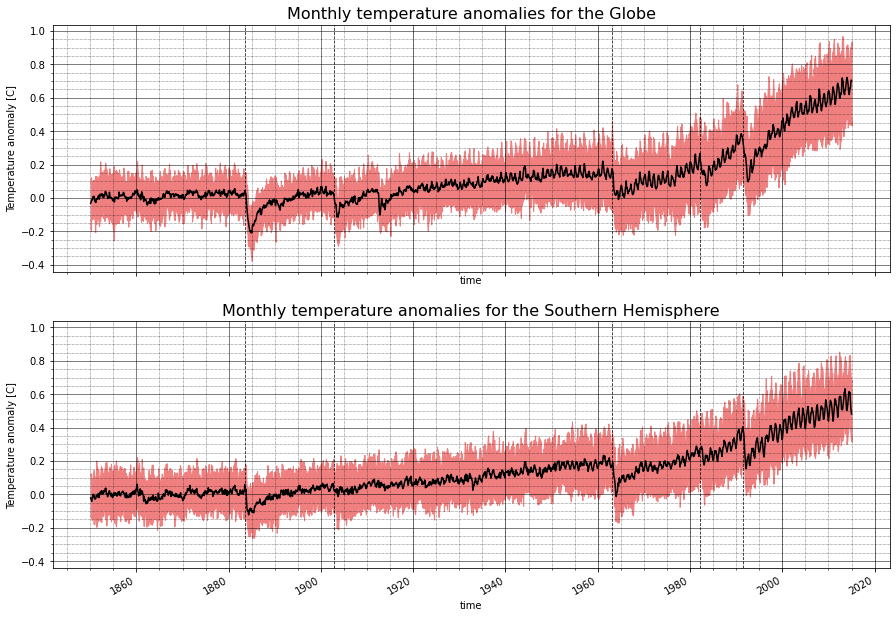

In [38]:
# Monthly temperature anomalies
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15,10)) # make a figure

# SUBPLOT 1
# plot the percentiles
ax[0].fill_between(p10_mon_Glob.time.data, p10_mon_Glob.tas.data, p90_mon_Glob.tas.data, color='lightcoral')
# plot the multi_model mean
mmm_mon_Glob.tas.plot(color = 'k', ax=ax[0]) 
ax[0].set_title('Monthly temperature anomalies for the Globe', fontsize=16)
ax[0].set_ylabel('Temperature anomaly [C]')

ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='k') # customise major grid
ax[0].minorticks_on() # need this line in order to get the minor grid lines 
ax[0].grid(which='minor', linestyle=':', linewidth='0.5', color='k')

# Plot a dashed line to show the eruption time for the 5 major eruptions
ax[0].axvline(x='1883-08', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[0].axvline(x='1902-10', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[0].axvline(x='1963-03', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[0].axvline(x='1982-04', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[0].axvline(x='1991-06', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')

# SUBPLOT 2
# plot the percentiles
ax[1].fill_between(p10_mon_SH.time.data, p10_mon_SH.tas.data, p90_mon_SH.tas.data, color='lightcoral')
# plot the multi_model mean
mmm_mon_SH.tas.plot(color = 'k', ax=ax[1]) 

ax[1].set_title('Monthly temperature anomalies for the Southern Hemisphere', fontsize=16)
ax[1].set_ylabel('Temperature anomaly [C]') # this overrides the label which comes on automatically using the xarray title

ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='k') # customise major grid
ax[1].minorticks_on() # need this line in order to get the minor grid lines 
ax[1].grid(which='minor', linestyle=':', linewidth='0.5', color='k')

# Plot a dashed line to show the eruption time for the 5 major eruptions
ax[1].axvline(x='1883-08', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[1].axvline(x='1902-10', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[1].axvline(x='1963-03', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[1].axvline(x='1982-04', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[1].axvline(x='1991-06', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

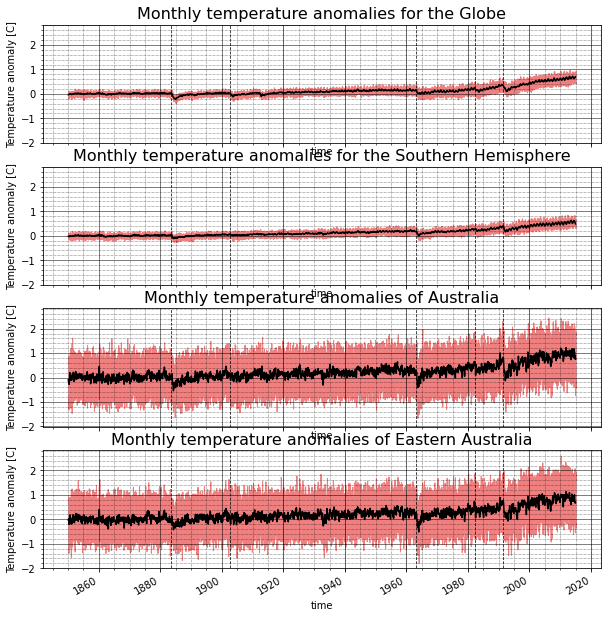

In [48]:
# Monthly temperature anomalies
fig, ax = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(10,10)) # make a figure

# SUBPLOT 1
# plot the percentiles
ax[0].fill_between(p10_mon_Glob.time.data, p10_mon_Glob.tas.data, p90_mon_Glob.tas.data, color='lightcoral')
# plot the multi_model mean
mmm_mon_Glob.tas.plot(color = 'k', ax=ax[0]) 
ax[0].set_title('Monthly temperature anomalies for the Globe', fontsize=16)
ax[0].set_ylabel('Temperature anomaly [C]')

ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='k') # customise major grid
ax[0].minorticks_on() # need this line in order to get the minor grid lines 
ax[0].grid(which='minor', linestyle=':', linewidth='0.5', color='k')

# Plot a dashed line to show the eruption time for the 5 major eruptions
ax[0].axvline(x='1883-08', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[0].axvline(x='1902-10', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[0].axvline(x='1963-03', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[0].axvline(x='1982-04', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[0].axvline(x='1991-06', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')

# SUBPLOT 2
# plot the percentiles
ax[1].fill_between(p10_mon_SH.time.data, p10_mon_SH.tas.data, p90_mon_SH.tas.data, color='lightcoral')
# plot the multi_model mean
mmm_mon_SH.tas.plot(color = 'k', ax=ax[1]) 

ax[1].set_title('Monthly temperature anomalies for the Southern Hemisphere', fontsize=16)
ax[1].set_ylabel('Temperature anomaly [C]') # this overrides the label which comes on automatically using the xarray title

ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='k') # customise major grid
ax[1].minorticks_on() # need this line in order to get the minor grid lines 
ax[1].grid(which='minor', linestyle=':', linewidth='0.5', color='k')

# Plot a dashed line to show the eruption time for the 5 major eruptions
ax[1].axvline(x='1883-08', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[1].axvline(x='1902-10', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[1].axvline(x='1963-03', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[1].axvline(x='1982-04', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[1].axvline(x='1991-06', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')

# # SUBPLOT 3
# plot the percentiles
ax[2].fill_between(p10_mon_Aus.time.data, p10_mon_Aus.tas.data, p90_mon_Aus.tas.data, color='lightcoral')
# plot the multi_model mean
mmm_mon_Aus.tas.plot(color = 'k', ax=ax[2]) 

ax[2].set_title('Monthly temperature anomalies of Australia', fontsize=16)
ax[2].set_ylabel('Temperature anomaly [C]') # this overrides the label which comes on automatically using the xarray title

ax[2].grid(which='major', linestyle='-', linewidth='0.5', color='k') # customise major grid
ax[2].minorticks_on() # need this line in order to get the minor grid lines 
ax[2].grid(which='minor', linestyle=':', linewidth='0.5', color='k')

# Plot a dashed line to show the eruption time for the 5 major eruptions
ax[2].axvline(x='1883-08', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[2].axvline(x='1902-10', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[2].axvline(x='1963-03', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[2].axvline(x='1982-04', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[2].axvline(x='1991-06', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')

# SUBPLOT 4
# plot the percentiles
ax[3].fill_between(p10_mon_EA.time.data, p10_mon_EA.tas.data, p90_mon_EA.tas.data, color='lightcoral')
# plot the multi_model mean
mmm_mon_EA.tas.plot(color = 'k', ax=ax[3]) 

ax[3].set_title('Monthly temperature anomalies of Eastern Australia', fontsize=16)
ax[3].set_ylabel('Temperature anomaly [C]') # this overrides the label which comes on automatically using the xarray title

ax[3].grid(which='major', linestyle='-', linewidth='0.5', color='k') # customise major grid
ax[3].minorticks_on() # need this line in order to get the minor grid lines 
ax[3].grid(which='minor', linestyle=':', linewidth='0.5', color='k')

# Plot a dashed line to show the eruption time for the 5 major eruptions
ax[3].axvline(x='1883-08', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[3].axvline(x='1902-10', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[3].axvline(x='1963-03', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[3].axvline(x='1982-04', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')
ax[3].axvline(x='1991-06', color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')


In [ ]:
# select the anomaly for each season

anom_djf = mean_seasonal.sel(season = 'DJF')
anom_mam = mean_seasonal.sel(season = 'MAM')
anom_jja = mean_seasonal.sel(season = 'JJA')
anom_son = mean_seasonal.sel(season = 'SON')

In [ ]:
mmm_djf = mmm_seasonal.sel(season = 'DJF')
mmm_mam = mmm_seasonal.sel(season = 'MAM')
mmm_jja = mmm_seasonal.sel(season = 'JJA')
mmm_son = mmm_seasonal.sel(season = 'SON')